
# Naive Bayes (Multinomial vs Gaussian) Extra GridSearch

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups

def plot_confusion_matrix(cm, class_names, title="Matriz de confusión"):
    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, cmap="managua")
    ax.set_title(title)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")
    ax.set_xticks(range(len(class_names)))
    ax.set_yticks(range(len(class_names)))
    ax.set_xticklabels(class_names, rotation=45, ha="right")
    ax.set_yticklabels(class_names)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center")
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()


## 1) Multinomial Naive Bayes Noticias


Accuracy: 0.9616935483870968
                    precision    recall  f1-score   support

         sci.space       0.94      0.98      0.96       249
rec.sport.baseball       0.98      0.94      0.96       247

          accuracy                           0.96       496
         macro avg       0.96      0.96      0.96       496
      weighted avg       0.96      0.96      0.96       496



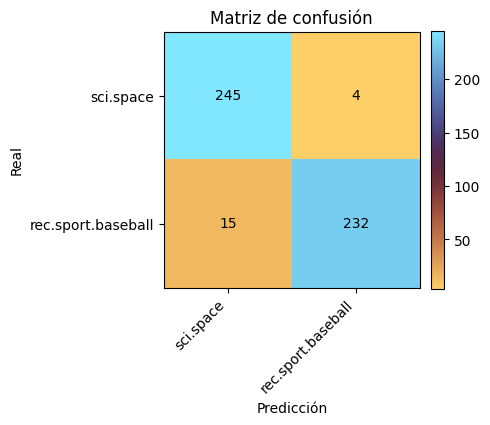

In [28]:
categories = ['sci.space', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers','footers','quotes'))

X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42, stratify=newsgroups.target)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenar Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=categories))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['sci.space', 'rec.sport.baseball'], title="Matriz de confusión")


## 2) Gaussian Naive Bayes Iris


Accuracy (GaussianNB - Iris): 0.9737
Reporte de clasificación:
               precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        13
  versicolor     0.9286    1.0000    0.9630        13
   virginica     1.0000    0.9167    0.9565        12

    accuracy                         0.9737        38
   macro avg     0.9762    0.9722    0.9732        38
weighted avg     0.9756    0.9737    0.9736        38



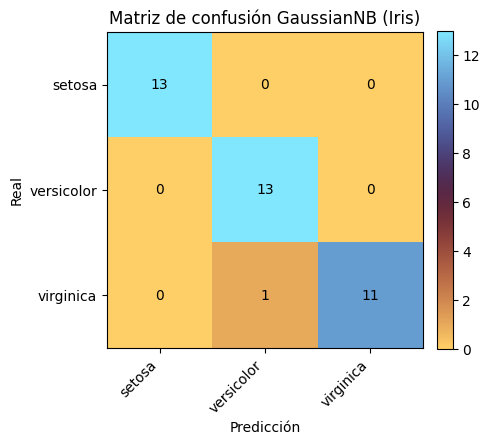

In [29]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy (GaussianNB - Iris):", round(accuracy_score(y_test, y_pred), 4))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=class_names, digits=4))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names, title="Matriz de confusión GaussianNB (Iris)")


## 3) Random Forest + GridSearchCV (demostración)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor accuracy CV: 0.9644
Accuracy en test (RF mejor): 0.9211
Reporte de clasificación:
               precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        13
  versicolor     0.8000    1.0000    0.8889        12
   virginica     1.0000    0.7692    0.8696        13

    accuracy                         0.9211        38
   macro avg     0.9333    0.9231    0.9195        38
weighted avg     0.9368    0.9211    0.9203        38



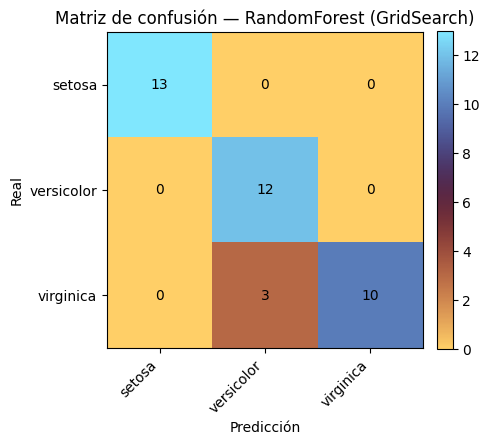

CPU times: user 1.25 s, sys: 82.6 ms, total: 1.33 s
Wall time: 52.1 s


In [30]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27, stratify=y)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 3, 5, 8],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
rf = RandomForestClassifier(random_state=123)

grid = GridSearchCV(rf, param_grid=param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor accuracy CV:", round(grid.best_score_, 4))

best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy en test (RF mejor):", round(accuracy_score(y_test, y_pred), 4))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=class_names, digits=4))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names, title="Matriz de confusión — RandomForest (GridSearch)")